- [assignments 1 page](https://www.csie.ntu.edu.tw/~cyy/courses/vfx/22spring/assignments/proj1/)
- Author: R10944007 曾宏鈞, 許博翔 

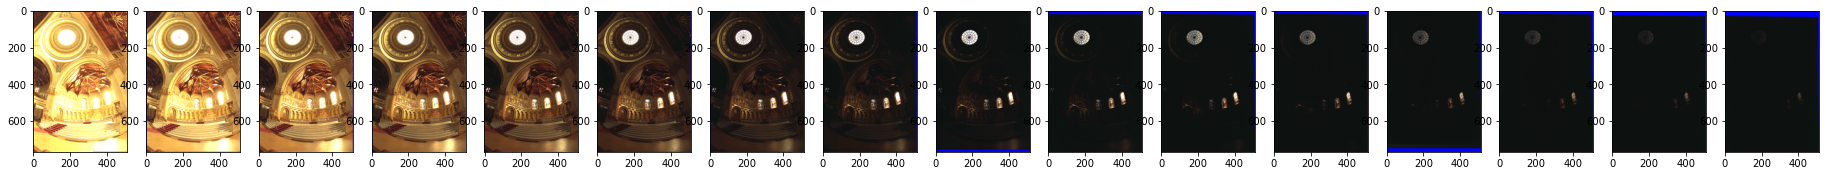

In [25]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

path = "../data/Memorial_SourceImages/*png"
files = glob.glob(path)
images = [cv2.imread(f) for f in files]
shutter_speed  = np.array([1/32, 1/16, 1/8., 1/4, 1/2, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])
plt.figure(figsize=(32,32))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))

# Image Alignment 
- Median Threshold Bitmap Alignment (MTB)

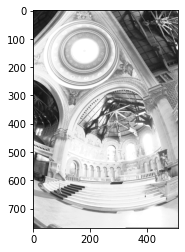

In [19]:

src = images[0]
h, w, c = src.shape
median = np.median(src)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")

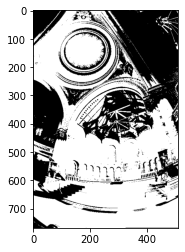

In [16]:
## Median Threshold Bitmap Alignment


mtd = np.zeros((h,w))
mtd[ gray>median ] = 1
plt.imshow(mtd, cmap="gray")

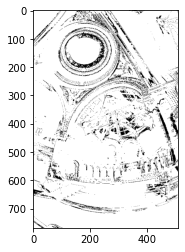

In [13]:
# todo: >mediam, 1. <mediam, 0
threshold = 10
exclusion_bitmap = np.ones((h,w))
exclusion_bitmap[ np.where(np.abs(gray - median) <= threshold) ] = 0
plt.imshow(exclusion_bitmap, cmap="gray")


In [12]:
np.abs(gray - median)

array([[155., 118.,  97., ...,  25.,  26.,   1.],
       [155., 108.,  78., ...,   6.,  21.,   9.],
       [155.,  73.,  87., ...,  34.,   3.,   4.],
       ...,
       [155.,  95.,  94., ...,  57.,  54.,  52.],
       [155.,  94.,  92., ...,  58.,  57.,  57.],
       [155.,  93.,  92., ..., 155., 155., 155.]])

In [21]:
src.shape

(512, 3)